# Import important libraries

In [6]:
!pip install imbalanced-learn

In [189]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
seed = 42
tf.random.set_seed(seed)

# Download MCS dataset

In [190]:
# !gdown --id 11_0c5fvFpydBb0-pWCDcxzp3-ZiUtKGX

In [191]:
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')
df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


# Split the dataset into training dataset (80%) and test dataset (20%)

In [192]:
from sklearn.model_selection import train_test_split

y = df['Ligitimacy']
X = df.drop(['Ligitimacy'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed, stratify=y)
X_test.shape

(2897, 12)

# Implement classic classifiers (Adaboost and RF)

In [193]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

adaBoostClassifier = AdaBoostClassifier()
randomForestClassifier = RandomForestClassifier()

## Check the balance of the dataset

In [194]:
y_train.value_counts()

1    10069
0     1518
Name: Ligitimacy, dtype: int64

### So, we should upsample the dataset to make it balanced and train a good classifiers

In [195]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=seed)
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

# Train Adaboost and RF via training dataset


In [196]:
## fit models on training data
adaBoostClassifier.fit(X_train_smoted,y_train_smoted)
randomForestClassifier.fit(X_train_smoted,y_train_smoted)

y_pred_train_adaBoost = adaBoostClassifier.predict(X_train_smoted)
y_pred_train_randomForest = randomForestClassifier.predict(X_train_smoted)
print('AdaBoost training classification report')
print(classification_report(y_train_smoted, y_pred_train_adaBoost))
print('RandomForest training classification report')
print(classification_report(y_train_smoted, y_pred_train_randomForest))

AdaBoost training classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10069
           1       0.97      0.93      0.95     10069

    accuracy                           0.95     20138
   macro avg       0.95      0.95      0.95     20138
weighted avg       0.95      0.95      0.95     20138

RandomForest training classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10069
           1       1.00      1.00      1.00     10069

    accuracy                           1.00     20138
   macro avg       1.00      1.00      1.00     20138
weighted avg       1.00      1.00      1.00     20138



# Verify detection performance using test dataset and present results comparison in bar chart


In [197]:
y_pred_test_adaBoost = adaBoostClassifier.predict(X_test)
y_pred_test_randomForest = randomForestClassifier.predict(X_test)
print('AdaBoost testing classification report')
print(classification_report(y_test, y_pred_test_adaBoost))
print('RandomForest testing classification report')
print(classification_report(y_test, y_pred_test_randomForest))

AdaBoost testing classification report
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       379
           1       0.99      0.93      0.96      2518

    accuracy                           0.93      2897
   macro avg       0.82      0.92      0.86      2897
weighted avg       0.94      0.93      0.93      2897

RandomForest testing classification report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       379
           1       1.00      1.00      1.00      2518

    accuracy                           0.99      2897
   macro avg       0.99      0.98      0.99      2897
weighted avg       0.99      0.99      0.99      2897



In [198]:
AdaBoost_Testing_Accuracy = accuracy_score(y_pred_test_adaBoost, y_test)
Random_Forest_Testing_Accuracy =accuracy_score(y_pred_test_randomForest, y_test)
acc_dict = {'AdaBoost_Testing_Accuracy':AdaBoost_Testing_Accuracy,
            'Random_Forest_Testing_Accuracy':Random_Forest_Testing_Accuracy}
acc_dict

{'AdaBoost_Testing_Accuracy': 0.9257852951328961,
 'Random_Forest_Testing_Accuracy': 0.9937866758715913}

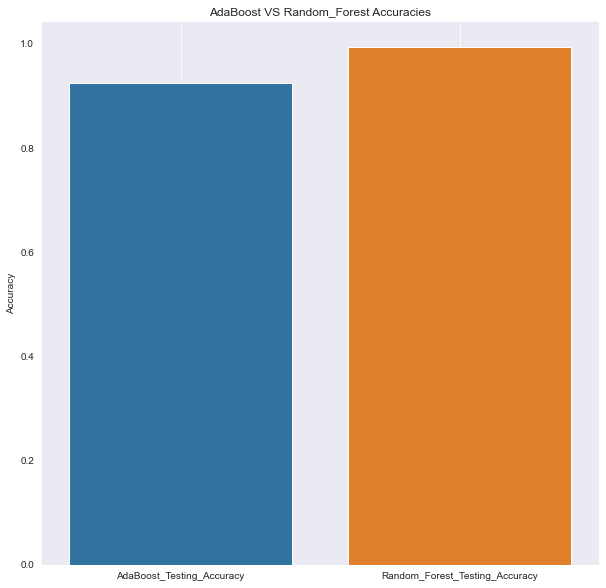

In [199]:
sorted_acc_tup = sorted(acc_dict.items(),key=lambda item:item[1])
acc_dict = {k:v for k,v in sorted_acc_tup}
plt.rcParams["figure.figsize"] = (10,10)

sns.barplot(x = list(acc_dict.keys()), y=list(acc_dict.values()))
plt.grid()
plt.ylabel('Accuracy')
plt.title('AdaBoost VS Random_Forest Accuracies');

# Implement Conditional GAN with Wasserstein loss

### Data scaling

In [200]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_smoted_scaled = scaler.fit_transform(X_train_smoted)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_smoted_scaled

array([[0.99249812, 0.24691239, 0.19038729, ..., 0.8       , 0.        ,
        0.24385902],
       [0.50187547, 0.8656828 , 0.48180773, ..., 0.07142857, 0.        ,
        0.85362741],
       [0.36184046, 0.76124423, 0.83948626, ..., 0.32857143, 0.        ,
        0.7560968 ],
       ...,
       [0.28982246, 0.53945756, 0.47422468, ..., 0.65714286, 0.        ,
        0.53656001],
       [0.75743936, 0.67476991, 0.16140315, ..., 0.67142857, 0.        ,
        0.68287282],
       [0.03325831, 0.68059008, 0.16064208, ..., 0.04285714, 0.        ,
        0.68287282]])

### Constants and hyperparameters

In [201]:
batch_size = 1024
num_classes = 2
take_size = 12
latent_dim = 126

## Create tensor Dataset

In [228]:
from tensorflow import keras
from keras import layers
task_shape = (take_size + num_classes, 1)
X_train_smoted = X_train_smoted.astype(np.float32)
X_train_smoted_scaled = X_train_smoted_scaled.astype(np.float32)
all_labels = keras.utils.to_categorical(y_train_smoted, 2)
# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((X_train_smoted_scaled, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [229]:
def conv_block(x,filters,activation,kernel_size=2,strides=1,padding="same",use_bias=True,use_bn=False,use_dropout=False,drop_value=0.5,):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias)(x)
    if use_bn:
        x = layers.BatchNormalization()(x)
    x = activation(x)
    if use_dropout:
        x = layers.Dropout(drop_value)(x)
    return x

def get_discriminator_model():
    img_input = layers.Input(shape=task_shape)
    x = conv_block(img_input,64,kernel_size=3,strides=2,use_bn=False,use_bias=True,activation=layers.LeakyReLU(0.2),use_dropout=False,drop_value=0.3,)
    x = conv_block(x,128,kernel_size=3,strides=2,use_bn=False,activation=layers.LeakyReLU(0.2),use_bias=True,use_dropout=True,drop_value=0.3,)
    x = conv_block(x,256,kernel_size=2,strides=2,use_bn=False,activation=layers.LeakyReLU(0.2),use_bias=True,use_dropout=True,drop_value=0.3,)
    x = conv_block(x,512,kernel_size=3,strides=2,use_bn=False,activation=layers.LeakyReLU(0.2),use_bias=True,use_dropout=False,drop_value=0.3,)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(1,activation='sigmoid')(x)
    d_model = keras.models.Model(img_input, x, name="discriminator")
    return d_model

d_model = get_discriminator_model()
d_model.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 14, 1)]           0         
                                                                 
 conv1d_24 (Conv1D)          (None, 7, 64)             256       
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 7, 64)             0         
                                                                 
 conv1d_25 (Conv1D)          (None, 4, 128)            24704     
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 4, 128)            0         
                                                                 
 dropout_25 (Dropout)        (None, 4, 128)            0         
                                                                 
 conv1d_26 (Conv1D)          (None, 2, 256)          

## Create the generator

In [230]:

def block(x,filters,activation,kernel_size=3,strides=1,padding="same",use_bn=False,use_bias=True,use_dropout=False,drop_value=0.3,):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias)(x)
    if use_bn:
        x = layers.BatchNormalization()(x)
    if activation:
        x = activation(x)
    if use_dropout:
        x = layers.Dropout(drop_value)(x)
    return x

def get_generator_model():
    noise = layers.Input(shape=(latent_dim+num_classes,))
    x = layers.Dense(4 * 4 * 256, use_bias=False,activation='relu')(noise)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dense(256, use_bias=False,activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(take_size,activation='leaky_relu')(x)
    g_model = keras.models.Model(noise, x, name="generator")
    return g_model


g_model = get_generator_model()
g_model.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128)]             0         
                                                                 
 dense_28 (Dense)            (None, 4096)              524288    
                                                                 
 batch_normalization_14 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 4096)              0         
                                                                 
 dense_29 (Dense)            (None, 256)               1048576   
                                                                 
 batch_normalization_15 (Bat  (None, 256)              1024      
 chNormalization)                                        

## Create the CGAN model

In [231]:
class CGAN(keras.Model):
    def __init__(self,discriminator,generator,latent_dim,):
        super(CGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(CGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        real_task,one_hot_labeld=data
        if isinstance(real_task, tuple):
            real_task = real_task[0]

        real_task=tf.concat([real_task,one_hot_labeld],axis=1)
        # Get the batch size
        batch_size = tf.shape(real_task)[0]

        # Get the latent vector
        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim),seed=seed
        )
        random_latent_vectors=tf.concat([random_latent_vectors,one_hot_labeld],axis=1)

        # Generate fake images from the latent vector
        fake_task = self.generator(random_latent_vectors)
        # Get the logits for the fake images
        fake_task=tf.concat([fake_task,one_hot_labeld],axis=1)
        combined_tasks = tf.concat(
            [real_task,fake_task], axis=0
        )

         # Assemble labels discriminating real from fake images.
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_tasks)
            d_loss = self.loss_fn(labels, predictions)

        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Get the latent vector
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim),seed=seed)
        random_latent_vectors=tf.concat([random_latent_vectors,one_hot_labeld],axis=1)

        # Assemble labels that say "all real images".
        misleading_labels = tf.ones((batch_size, 1))

        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            generated_task = self.generator(random_latent_vectors, training=True)
            generated_task=tf.concat([generated_task,one_hot_labeld],axis=1)

            predictions = self.discriminator(generated_task)
            g_loss = self.loss_fn(misleading_labels, predictions)

        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }


# Apply the provided training dataset to CGAN

## Train the end-to-end model

In [232]:
# Set the number of epochs for training.
epochs = 8

# Get the wgan model
cgan = CGAN(
    discriminator=d_model,
    generator=g_model,
    latent_dim=latent_dim,
)

# Compile the wgan model
cgan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

# Start training
cgan.fit(dataset, batch_size=batch_size, epochs=epochs,
         )

Epoch 1/8
20/20 [==============================] - 9s 351ms/step - g_loss: 0.4883 - d_loss: 0.6710
Epoch 2/8
20/20 [==============================] - 7s 343ms/step - g_loss: 1.3779 - d_loss: 0.5935
Epoch 3/8
20/20 [==============================] - 7s 345ms/step - g_loss: 3.8624 - d_loss: 0.2981
Epoch 4/8
20/20 [==============================] - 7s 354ms/step - g_loss: 4.4488 - d_loss: 0.1425
Epoch 5/8
20/20 [==============================] - 7s 357ms/step - g_loss: 1.6385 - d_loss: 0.0283
Epoch 6/8
20/20 [==============================] - 7s 350ms/step - g_loss: 0.3710 - d_loss: 0.0162
Epoch 7/8
20/20 [==============================] - 7s 355ms/step - g_loss: 0.1803 - d_loss: 0.0119
Epoch 8/8
20/20 [==============================] - 7s 348ms/step - g_loss: 0.1096 - d_loss: 0.0110


# Generate synthetic fake tasks via Generator network in CGAN after the training procedure

### To faul the model we will generate unligitimate(milicious) tasks and label them as 0

In [249]:
num_of_tasks=2000
trained_gen = cgan.generator
one_hot_example = keras.utils.to_categorical([0]*num_of_tasks, 2)
# Sample noise for the interpolation.
fake_noise = tf.random.normal(shape=(num_of_tasks, latent_dim),seed=seed)
# Combine the noise and the labels and run inference with the generator.
noise_and_labels = tf.concat([fake_noise, one_hot_example], 1)
fake = trained_gen.predict(noise_and_labels)

63/63 [==============================] - 0s 4ms/step


In [250]:
fake.shape

(2000, 12)

In [251]:
fake_inverse=scaler.inverse_transform(fake)
fake_tasks_df=pd.DataFrame(fake_inverse,columns=df.columns[:-1])
fake_tasks_df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,-571.647766,45.508526,-75.231567,0.464455,8.157324,15.363562,70.693222,38.458027,6.308796,59.122658,0.480240,751750.062500
1,-707.057068,45.543427,-75.253136,2.126899,-0.225837,31.519039,40.482040,31.859896,0.869059,47.446232,0.640747,433531.906250
2,-437.908325,45.535580,-75.260628,0.816118,-0.066987,5.977089,40.335255,43.358593,0.836522,32.691059,0.536599,428903.812500
3,-200.460724,45.591099,-75.253296,1.006211,-0.845838,0.894647,14.545959,48.160007,-0.408405,25.144382,0.469786,18337.121094
4,-227.991348,45.537971,-75.235260,0.849303,1.017915,12.562887,38.535370,50.703716,0.637425,40.800304,0.637392,207623.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-444.878815,45.526932,-75.300354,0.836905,-1.133905,15.083454,17.918312,29.723480,0.382905,30.735096,0.497608,242898.890625
1996,-273.710052,45.553280,-75.239441,2.016987,0.202000,6.865791,23.347864,40.295158,0.284052,50.410530,0.466032,204299.546875
1997,-143.908173,45.538853,-75.241570,1.251927,-0.380992,1.363171,17.889383,45.678703,-0.430957,28.103292,0.531100,-23143.039062
1998,-452.967377,45.521236,-75.309387,1.625790,3.966226,24.816416,24.458256,43.193783,0.436114,43.095985,0.414003,61672.214844


In [252]:
fake_tasks_df.to_csv('Generated_fake_milicious_tasks.csv',index=False)

### Test the goodness of our generation

In [253]:
mm = adaBoostClassifier.predict(fake_tasks_df)
pd.DataFrame(mm).value_counts()

1    1862
0     138
dtype: int64

### Here the model is wrong in 1862 sample and right in only 138 sample and this is a good evidence that we succeeded in scammimg the model because all this tasks should be calssified as unligitmate


# Mix the generated fake tasks with the original test dataset to obtain a new test dataset

### Mixing step

In [285]:
mixed_test_dataset=pd.concat([X_test,fake_tasks_df])
mixed_test_dataset=mixed_test_dataset.reset_index()
mixed_test_dataset.drop('index',axis=1,inplace=True)
mixed_test_dataset

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,1031.000000,45.556369,-75.201917,3.000000,11.000000,9.000000,40.000000,20.000000,1.000000,86.000000,0.000000,319073.000000
1,209.000000,45.469987,-75.155623,4.000000,16.000000,8.000000,60.000000,10.000000,8.000000,53.000000,0.000000,178319.000000
2,3653.000000,45.536579,-75.161880,5.000000,8.000000,35.000000,50.000000,30.000000,8.000000,63.000000,1.000000,290926.000000
3,94.000000,45.392164,-75.235236,4.000000,4.000000,36.000000,40.000000,30.000000,6.000000,74.000000,0.000000,37549.000000
4,1283.000000,45.496407,-75.183561,4.000000,4.000000,1.000000,50.000000,30.000000,5.000000,60.000000,0.000000,215851.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4892,-444.878815,45.526932,-75.300354,0.836905,-1.133905,15.083454,17.918312,29.723480,0.382905,30.735096,0.497608,242898.890625
4893,-273.710052,45.553280,-75.239441,2.016987,0.202000,6.865791,23.347864,40.295158,0.284052,50.410530,0.466032,204299.546875
4894,-143.908173,45.538853,-75.241570,1.251927,-0.380992,1.363171,17.889383,45.678703,-0.430957,28.103292,0.531100,-23143.039062
4895,-452.967377,45.521236,-75.309387,1.625790,3.966226,24.816416,24.458256,43.193783,0.436114,43.095985,0.414003,61672.214844


### We should label all these tasks as unligitimate tasks

In [287]:
y_for_fake_tasks=pd.DataFrame({'Ligitimacy':[0]*2000},)
mixed_y_test=pd.concat([y_test,y_for_fake_tasks['Ligitimacy']])
mixed_y_test=mixed_y_test.reset_index()
mixed_y_test.drop('index',axis=1,inplace=True)
mixed_y_test

,Ligitimacy
0,1
1,0
2,0
3,1
4,1
...,...
4892,0
4893,0
4894,0
4895,0


# Obtain Adaboost and RF detection performance using the new test dataset and present results in bar chart

AdaBoostClassifier accuracy for the mixed data= 0.5758627731264039
RandomForestClassifier accuracy for the mixed data = 0.5909740657545436


<AxesSubplot:>

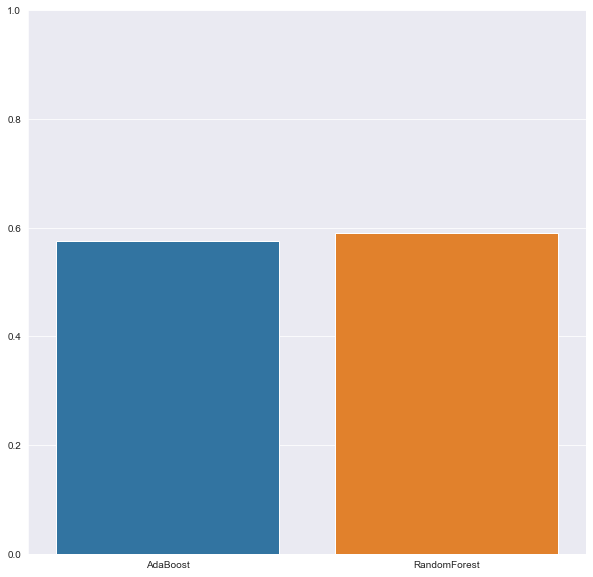

In [288]:
adaboost_accuracy=adaBoostClassifier.score(mixed_test_dataset,mixed_y_test)
rf_accuracy=randomForestClassifier.score(mixed_test_dataset,mixed_y_test)
print(f'AdaBoostClassifier accuracy for the mixed data= {adaboost_accuracy}')
print(f'RandomForestClassifier accuracy for the mixed data = {rf_accuracy}')
plt.figure(figsize=(10,10))
plt.ylim(0,1)
sns.barplot(x=['AdaBoost','RandomForest'],y=[adaboost_accuracy,rf_accuracy],)

### We can notice that in Adaboost the accuracy has been decreased from 0.925 to 0.575 .
### and in Random forest the accuracy has been decreased from 0.990 to 0.590.
## So, our generation is good and scammed the models

# Consider the Discriminator to as the first level classifier and RF/Adaboost as the second level classifier

### Because of our discriminator is trained on scaled data, so we will scale this data

In [289]:
mixed_test_dataset_scaled=scaler.transform(mixed_test_dataset)
mixed_test_dataset_scaled

array([[ 0.25756439,  0.87078121,  0.53914657, ...,  0.8       ,
         0.        ,  0.85363261],
       [ 0.052013  ,  0.4764824 ,  0.72794642, ...,  0.32857143,
         0.        ,  0.4878012 ],
       [ 0.91322831,  0.78044984,  0.70242734, ...,  0.47142857,
         1.        ,  0.7804762 ],
       ...,
       [-0.0362361 ,  0.79082618,  0.37743027, ..., -0.02709582,
         0.53109992, -0.03581547],
       [-0.11352022,  0.71041532,  0.10085008, ...,  0.18708551,
         0.41400257,  0.18462646],
       [-0.09640464,  0.72824571,  0.41912421, ...,  0.1559173 ,
         0.54514861,  0.5607152 ]])

### Concat the labels as one hot encoding

In [290]:
one_hot_examples_for_mixed_dataset = keras.utils.to_categorical(mixed_y_test, 2)
mixed_test_dataset_scaled_and_labels = tf.concat([mixed_test_dataset_scaled, one_hot_examples_for_mixed_dataset], 1)
mixed_test_dataset_scaled_and_labels.shape

TensorShape([4897, 14])

### Detect the real and fake tasks using the discriminator as first level classification

In [291]:
trained_disc=cgan.discriminator

In [292]:
y_pred_mixed_from_disc=trained_disc.predict(mixed_test_dataset_scaled_and_labels)
y_pred_mixed_from_disc=np.apply_along_axis(lambda x:1 if x >=0.5 else 0,axis=1,arr=y_pred_mixed_from_disc,)
y_pred_mixed_from_disc=pd.DataFrame(y_pred_mixed_from_disc)
y_pred_mixed_from_disc

154/154 [==============================] - 0s 3ms/step


,0
0,1
1,1
2,1
3,1
4,1
...,...
4892,0
4893,0
4894,0
4895,0


## Filter synthetic tasks

In [296]:
index_of_real=y_pred_mixed_from_disc[y_pred_mixed_from_disc[0]==1].index.tolist()
filtered_real_tasks=mixed_test_dataset.loc[index_of_real,:]
filtered_real_tasks

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,1031.000000,45.556369,-75.201917,3.000000,11.000000,9.000000,40.000000,20.000000,1.000000,86.000000,0.000000,319073.00000
1,209.000000,45.469987,-75.155623,4.000000,16.000000,8.000000,60.000000,10.000000,8.000000,53.000000,0.000000,178319.00000
2,3653.000000,45.536579,-75.161880,5.000000,8.000000,35.000000,50.000000,30.000000,8.000000,63.000000,1.000000,290926.00000
3,94.000000,45.392164,-75.235236,4.000000,4.000000,36.000000,40.000000,30.000000,6.000000,74.000000,0.000000,37549.00000
4,1283.000000,45.496407,-75.183561,4.000000,4.000000,1.000000,50.000000,30.000000,5.000000,60.000000,0.000000,215851.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2894,3426.000000,45.504521,-75.275448,5.000000,23.000000,56.000000,40.000000,10.000000,4.000000,38.000000,0.000000,234608.00000
2895,3085.000000,45.551647,-75.291245,0.000000,22.000000,47.000000,40.000000,30.000000,2.000000,33.000000,0.000000,319062.00000
2896,3944.000000,45.481815,-75.122325,4.000000,7.000000,23.000000,20.000000,10.000000,4.000000,96.000000,1.000000,197091.00000
2978,-800.467224,45.450020,-75.255432,2.875970,15.527442,30.839828,82.083557,31.887712,11.261337,75.919724,0.270175,788574.43750


In [297]:
y_actual_of_filtered_tasks=mixed_y_test.loc[index_of_real,:]
y_actual_of_filtered_tasks

,Ligitimacy
0,1
1,0
2,0
3,1
4,1
...,...
2894,1
2895,1
2896,1
2978,0


### Using the classic classifiers as a second level after filtering the fake tasks

AdaBoostClassifier accuracy for the mixed data= 0.9260673377299549
RandomForestClassifier accuracy for the mixed data = 0.9930579659840333


<AxesSubplot:>

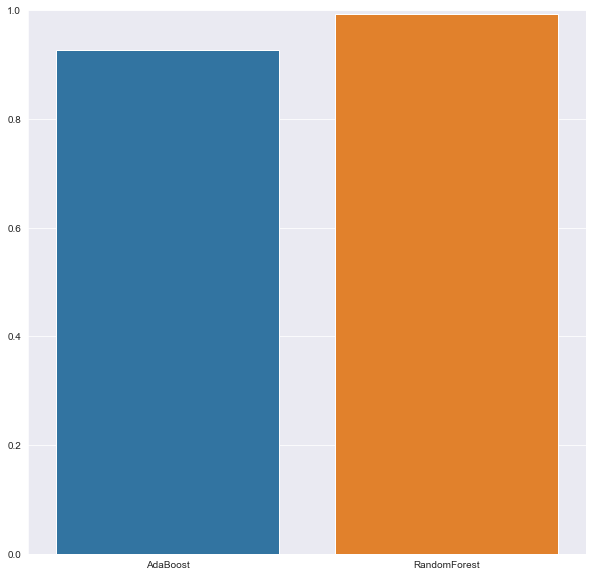

In [299]:
y_pred_ada_for_filtered_mixed_test=adaBoostClassifier.predict(filtered_real_tasks)
y_pred_rf_for_filtered_mixed_test=randomForestClassifier.predict(filtered_real_tasks)
adaboost_accuracy=accuracy_score(y_actual_of_filtered_tasks,y_pred_ada_for_filtered_mixed_test)
rf_accuracy=accuracy_score(y_actual_of_filtered_tasks,y_pred_rf_for_filtered_mixed_test)
print(f'AdaBoostClassifier accuracy for the mixed data= {adaboost_accuracy}')
print(f'RandomForestClassifier accuracy for the mixed data = {rf_accuracy}')
plt.figure(figsize=(10,10))
plt.ylim(0,1)
sns.barplot(x=['AdaBoost','RandomForest'],y=[adaboost_accuracy,rf_accuracy],)

### This is approximately the original accuracies before adding the fake tasks, and it's a good results because our discriminator is able to filter the fake tasks and our classic classifiers are now able to classify the real tasks if they ligitimit or not as they used to do